In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
data = {
    'text': [
        "I love this movie, it was fantastic!",
        "This film is terrible and boring.",
        "Amazing experience, great acting!",
        "Not good, very disappointing.",
        "Loved it! The direction was brilliant.",
        "Worst movie ever made."
    ],
    'sentiment': ['positive', 'negative', 'positive', 'negative', 'positive', 'negative']
}

df = pd.DataFrame(data)
df.head()

,text,sentiment
0,"I love this movie, it was fantastic!",positive
1,This film is terrible and boring.,negative
2,"Amazing experience, great acting!",positive
3,"Not good, very disappointing.",negative
4,Loved it! The direction was brilliant.,positive


In [5]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)
df.head()

,text,sentiment,clean_text
0,"I love this movie, it was fantastic!",positive,i love this movie it was fantastic
1,This film is terrible and boring.,negative,this film is terrible and boring
2,"Amazing experience, great acting!",positive,amazing experience great acting
3,"Not good, very disappointing.",negative,not good very disappointing
4,Loved it! The direction was brilliant.,positive,loved it the direction was brilliant


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['sentiment'], test_size=0.3, random_state=42
)

In [7]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Feature vector shape:", X_train_tfidf.shape)

Feature vector shape: (4, 11)


In [8]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

In [9]:
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)


🔹 Model: Naive Bayes
Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

    negative       0.50      1.00      0.67         1
    positive       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


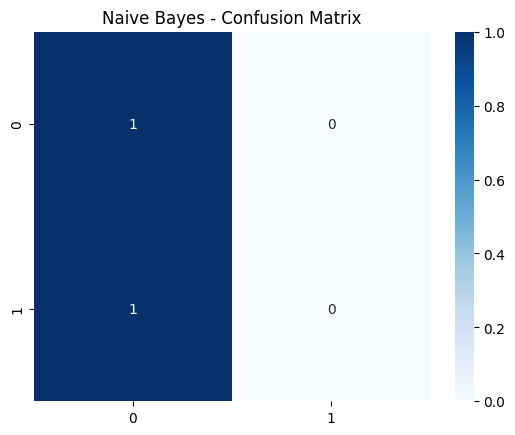


🔹 Model: Logistic Regression
Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
    positive       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



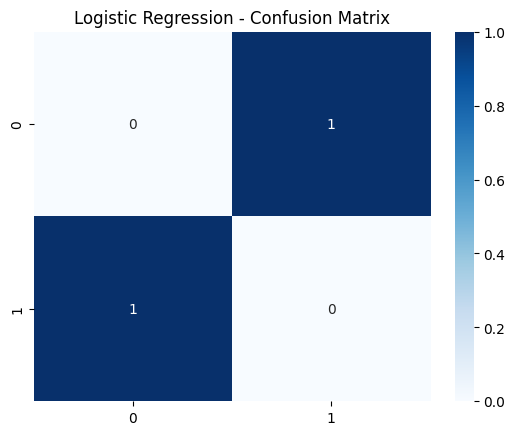

In [10]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n🔹 Model: {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

evaluate_model(y_test, y_pred_nb, "Naive Bayes")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

In [11]:
import joblib

joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(lr_model, "sentiment_model.pkl")

# Load later with:
# vectorizer = joblib.load("tfidf_vectorizer.pkl")
# model = joblib.load("sentiment_model.pkl")

['sentiment_model.pkl']

In [12]:
sample = ["This product is really good!", "I hated the movie, waste of time."]
sample_tfidf = vectorizer.transform(sample)
predictions = lr_model.predict(sample_tfidf)

for text, sentiment in zip(sample, predictions):
    print(f"{text} → {sentiment}")

This product is really good! → negative
I hated the movie, waste of time. → negative
